### standard , min-max , robust 비교 고찰

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler , RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

In [16]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1', 'x2'])
standard_df

,x1,x2
0,0.774202,0.583798
1,0.098554,-0.197534
2,-0.078384,0.091605
3,0.170444,-0.004378
4,-0.009089,-0.350995
...,...,...
1020,-4.551265,4.780492
1021,-5.455746,5.933347
1022,-5.660748,4.831718
1023,-5.186106,4.996831


In [17]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['x1', 'x2'])

In [18]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1', 'x2'])

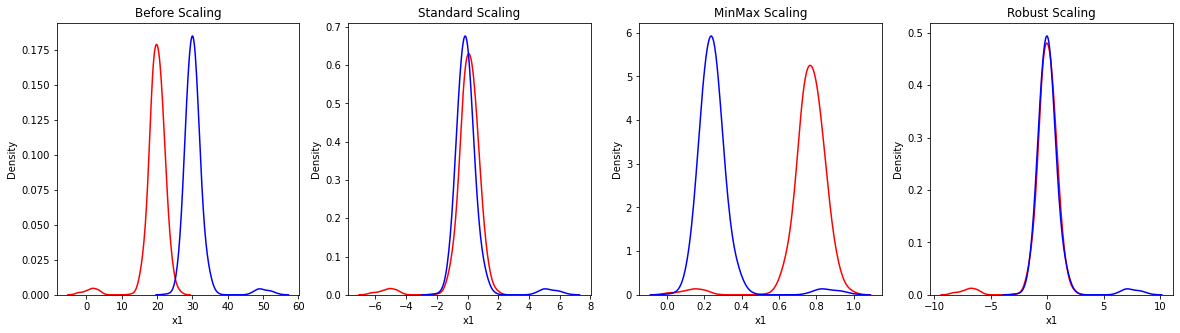

In [19]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x['x1'], ax=ax1, color='r')
sns.kdeplot(x['x2'], ax=ax1, color='b')

ax2.set_title("Standard Scaling")
sns.kdeplot(standard_df['x1'], ax=ax2, color='r')
sns.kdeplot(standard_df['x2'], ax=ax2, color='b')

ax3.set_title("MinMax Scaling")
sns.kdeplot(minmax_df['x1'], ax=ax3, color='r')
sns.kdeplot(minmax_df['x2'], ax=ax3, color='b')

ax4.set_title("Robust Scaling")
sns.kdeplot(robust_df['x1'], ax=ax4, color='r')
sns.kdeplot(robust_df['x2'], ax=ax4, color='b')


plt.show()

In [23]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df.mean())
print('feature들의 분산 값')
print(iris_df.std())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
feature들의 분산 값
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [24]:
from sklearn.datasets import load_iris
import pandas as pd 

# 붓꽃 데이터셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('feature들의 분산 값')
print(iris_df.std())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
feature들의 분산 값
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [25]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 scale 변환된 데이터 셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
iris_scaled_df1 = pd.DataFrame(iris_scaled, columns = iris.feature_names)
# iris_scaled_df.describe()
print('feature 들의 평균 값')
print(iris_scaled_df1.mean())
print('\nfeature 들의 분산 값')
print(iris_scaled_df1.std())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scales = pd.DataFrame(data= iris_scaled, columns=iris.feature_names)
print(iris_df_scales.max())
print(iris_df_scales.min())

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64


In [27]:
from sklearn.preprocessing import RobustScaler
rbscaler = RobustScaler()
rbscaler.fit(iris_df)
iris_rbscaled = rbscaler.transform(iris_df)
iris_df_rbscaled = pd.DataFrame(data=iris_rbscaled, columns=iris.feature_names)
iris_df_rbscaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


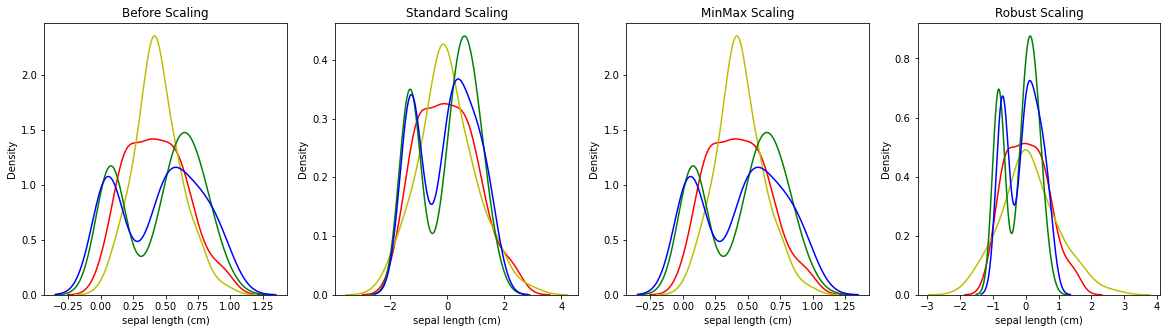

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(iris_df_scales['sepal length (cm)'], ax = ax1, color = 'r')
sns.kdeplot(iris_df_scales['sepal width (cm)'], ax = ax1, color = 'y')
sns.kdeplot(iris_df_scales['petal length (cm)'], ax = ax1, color = 'g')
sns.kdeplot(iris_df_scales['petal width (cm)'], ax = ax1, color = 'b')
ax2.set_title('Standard Scaling')
sns.kdeplot(iris_scaled_df1['sepal length (cm)'], ax = ax2, color = 'r')
sns.kdeplot(iris_scaled_df1['sepal width (cm)'], ax = ax2, color = 'y')
sns.kdeplot(iris_scaled_df1['petal length (cm)'], ax = ax2, color = 'g')
sns.kdeplot(iris_scaled_df1['petal width (cm)'], ax = ax2, color = 'b')
ax3.set_title('MinMax Scaling')
sns.kdeplot(iris_df_scales['sepal length (cm)'], ax = ax3, color = 'r')
sns.kdeplot(iris_df_scales['sepal width (cm)'], ax = ax3, color = 'y')
sns.kdeplot(iris_df_scales['petal length (cm)'], ax = ax3, color = 'g')
sns.kdeplot(iris_df_scales['petal width (cm)'], ax = ax3, color = 'b')
ax4.set_title('Robust Scaling')
sns.kdeplot(iris_df_rbscaled['sepal length (cm)'], ax = ax4, color = 'r')
sns.kdeplot(iris_df_rbscaled['sepal width (cm)'], ax = ax4, color = 'y')
sns.kdeplot(iris_df_rbscaled['petal length (cm)'], ax = ax4, color = 'g')
sns.kdeplot(iris_df_rbscaled['petal width (cm)'], ax = ax4, color = 'b')
plt.show()